In [2]:
%reset -s -f
import atomdnn
import os
import numpy as np
import pickle
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel", font_scale=2.5)

In [3]:
save_figures = False

# Energy

In [4]:
true_energy = np.loadtxt('curves/true_energy.csv')
pred_energy = np.loadtxt('curves/pred_energy.csv')

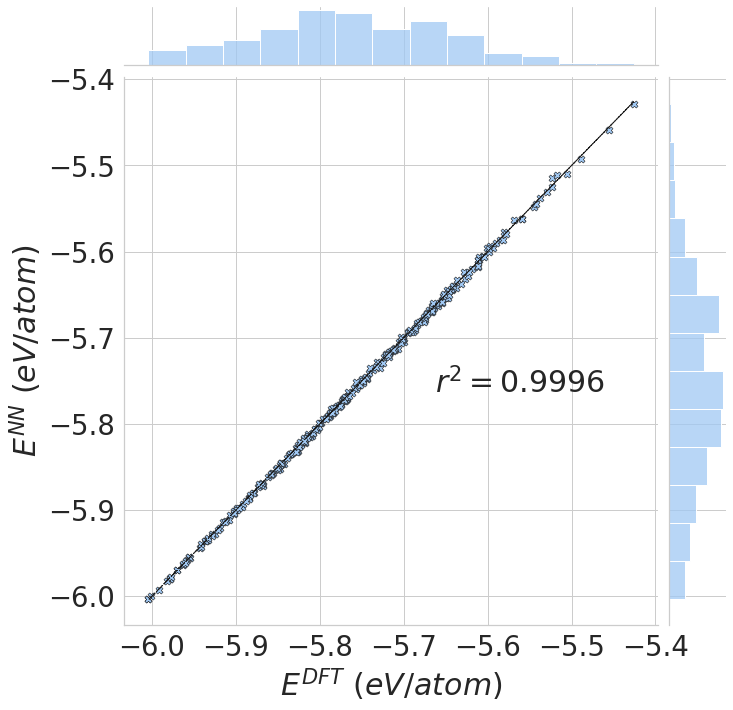

In [5]:
x = np.linspace(true_energy.min(), true_energy.max())

slope, intercept, r_value, p_value, std_err = stats.linregress(true_energy, pred_energy)

g = sns.jointplot(x=true_energy, y=pred_energy, height=10, ratio=8, marginal_ticks=False, ec="k", marker='X', s=50)
g.set_axis_labels(r'$E^{DFT}\ (eV/atom)$', '$E^{NN}\ (eV/atom)$', fontsize=30)
g.ax_joint.plot(true_energy, true_energy, '-.', c='k', lw=1, label='Perfect fit')
g.ax_joint.set_xticks(g.ax_joint.get_yticks())
g.ax_joint.set_xlim(g.ax_joint.get_ylim())
g.ax_joint.text(np.mean(true_energy)+0.1, np.mean(pred_energy), f'$r^2={r_value**2:0.4f}$')
# g.ax_joint.legend()
if save_figures:
    plt.savefig('figures/pred_vs_true_energy.png', dpi=1200, bbox_inches="tight")
plt.show()

# Force

In [6]:
from matplotlib.ticker import FuncFormatter
def custom_format(x, pos):
    # Format x as you desire, e.g., as a percentage
    return f"{x:.1f}"

In [7]:
true_force = np.loadtxt('curves/true_force.csv')
pred_force = np.loadtxt('curves/pred_force.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


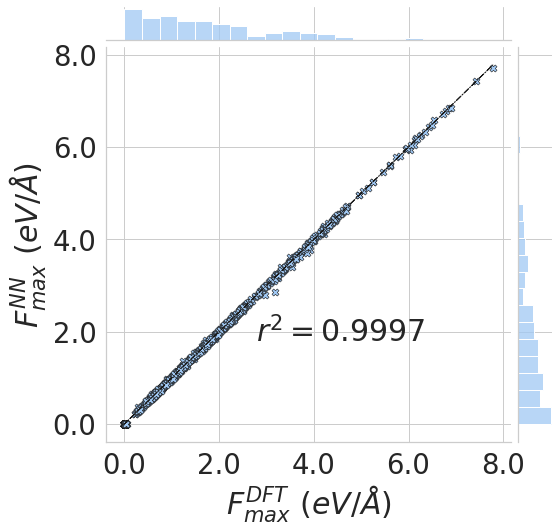

In [8]:
x = np.linspace(true_force.min(), true_force.max())

slope, intercept, r_value, p_value, std_err = stats.linregress(true_force, pred_force)

g = sns.jointplot(x=true_force, y=pred_force, height=8, ratio=10, marginal_ticks=False, ec="k", marker='X', s=50)
g.set_axis_labels(r'${F}_{max}^{DFT}\ (eV/Å)$', '${F}_{max}^{NN}\ (eV/Å)$', fontsize=30)
# g.ax_joint.plot([pred_force.min(), pred_force.max()], 
#                 [pred_force.min(), pred_force.max()],  '--k', lw=3, alpha=0.4)
# plt.axis('equal')
ax = g.ax_joint
ax.set_xticks(np.arange(0,9,2, dtype=np.float32))
ax.set_yticks(np.arange(0,9,2, dtype=np.float32))
ax.xaxis.set_major_formatter(FuncFormatter(custom_format))
ax.yaxis.set_major_formatter(FuncFormatter(custom_format))

ax.plot(true_force, true_force, '-.', c='k', lw=1, label='Perfect fit')
# ax.plot(x, x*slope+intercept, '--', c='r', lw=4, label='Linear fit')
# ax.scatter(true_force, pred_force, marker='s', edgecolors='k')
ax.set_xticks(ax.get_yticks())
ax.set_xlim(ax.get_ylim())
ax.text(np.mean(true_force)+1., np.mean(pred_force), f'$r^2={r_value**2:0.4f}$')
# ax.legend()
if save_figures:
    plt.savefig('figures/pred_vs_true_force.png', dpi=1200, bbox_inches="tight")
plt.show()

# stress

In [9]:
true_stress = np.loadtxt('curves/true_stress.csv')
pred_stress = np.loadtxt('curves/pred_stress.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


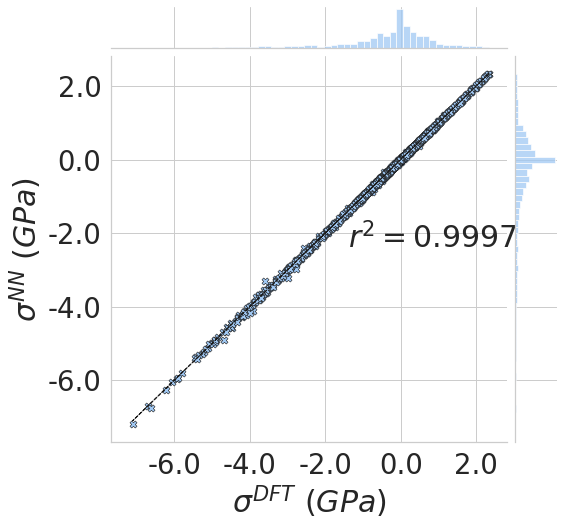

In [10]:
x = np.linspace(true_stress.min(), true_stress.max())

slope, intercept, r_value, p_value, std_err = stats.linregress(true_stress, pred_stress)

g = sns.jointplot(x=true_stress, y=pred_stress, height=8, ratio=8, marginal_ticks=False, ec="k", marker='X', s=50)
g.set_axis_labels(r'${\sigma}^{DFT}\ (GPa)$', '${\sigma}^{NN}\ (GPa)$', fontsize=30)
# g.ax_joint.plot([pred_stress.min(), pred_stress.max()], 
#                 [pred_stress.min(), pred_stress.max()],  '--k', lw=3, alpha=0.4)
# plt.axis('equal')
min_tick = np.floor(true_stress.min())
max_tick = np.ceil(true_stress.max())
ax = g.ax_joint
ax.set_xticks(np.arange(min_tick,max_tick,2, dtype=np.float32))
ax.set_yticks(np.arange(min_tick,max_tick,2, dtype=np.float32))
ax.xaxis.set_major_formatter(FuncFormatter(custom_format))
ax.yaxis.set_major_formatter(FuncFormatter(custom_format))

ax.plot(true_stress, true_stress, '--', c='k', lw=1, label='Perfect fit')
# ax.plot(x, x*slope+intercept, '--', c='r', lw=4, label='Linear fit')
# ax.scatter(true_stress, pred_stress, s=200, marker=None)
ax.set_xticks(ax.get_yticks())
ax.set_xlim(ax.get_ylim())
ax.text(np.mean(true_stress)-1, np.mean(pred_stress)-2, f'$r^2={r_value**2:0.4f}$')
# ax.legend()
if save_figures:
    plt.savefig('figures/pred_vs_true_stress.png', dpi=1200, bbox_inches="tight")
plt.show()